In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

* Use Adam
* Xavier initialization
* Batch normalization
* Dropout
* mini-batch

In [2]:
#train = pd.read_csv('house prediction data/train_cleaned.csv')
#test = pd.read_csv('house prediction data/test_cleaned.csv')

train = pd.read_csv('house prediction data/other_preprocessed_train.csv')
test = pd.read_csv('house prediction data/other_preprocessed_test.csv')

#train = pd.read_csv('house prediction data/other_preprocessed_box_cox_train.csv')
#test = pd.read_csv('house prediction data/other_preprocessed_box_cox_test.csv')

print(train.shape)
print(test.shape)

(1456, 321)
(1459, 321)


In [3]:
features = list(train.columns)

target = 'SalePrice'
features.remove(target)

train_x = train[features]
train_y = train[target]
test_x = test[features]

train_num = train_x.shape[0]
test_num = test_x.shape[1]

all_x = pd.concat([train_x, test_x])

# Use ANN to train with multiple features

In [4]:
from tf_ann import tf_ann

In [5]:
from cross_valid_api import cross_validate, root_mean_squred_error

### Inspired by the note https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset, which use elasticnet with l1 and l2 penalty and find out it doesn't need l2 compensate term.

In this case, there are too many features, using too many of them on small data could strongly hurt the generalization and hence cause much worse performance (larger rmse) on the validation set. Even though commonly used L2, dropout, batch normalization and so on can could help prevent the overfit confition; however using l1 regularization can have built-in feature selection to concentrate weights on real important features, which should be of more help in this case (small data + plenty of features). Maybe we can try to do PCA before training as well.

> L1 have built-in feature selection + sparse output (math + intuition): http://neuralnetworksanddeeplearning.com/chap3.html#overfitting_and_regularization 

### observation of hyperparameters

A lot of trials are not shown here.
For ann, there are too many hyper-params and it is hard to know what settings could have the best performance and how one hyperparameter affects another. 
Hence, instead of using grid-search, I randomly sampled several parameters to test.

I found that ANN perform poorly when:
* reg_loss_weight < 0.05 => not enough regularization, overfit, i.e. high valid set error w.r.t. train set
* bn decay rate > 0.9 => bad as well
* more layers with less l1_ratio
* it's ok to have high reg_loss_weight
* sigmoid function as activation function is not good

hence, focus on (reg_loss_weight >= 0.05) && (bn_decay_rate <= 0.9)

In [6]:
from sklearn.model_selection import train_test_split

In [33]:
ann_model = tf_ann(learning_rate= 0.01,
                    lr_decay_step = 20000,
                    lr_decay_rate = .1,
                    bn_decay_rate = 0.5,
                    reg_loss_weight = 0.8,
                    l1_ratio = 0.95,
                    num_epochs = 40000, 
                    minibatch_size = 512,
                    layer_count = 3, 
                    hidden_neuron =  [64, 32],
                    drop_rates = [0.0, 0.0, 0.0],
                    print_cost = True, # don't want to print cost during cv
                    profiling = False)

Cost after 100 epochs: 62.31909
Trainning set rmse: 9.50479
Validation set rmse: 9.52369
Remaining time: 0:13:18 

Cost after 200 epochs: 44.17732
Trainning set rmse: 0.149633
Validation set rmse: 0.145609
Remaining time: 0:6:38 

Cost after 300 epochs: 42.81055
Trainning set rmse: 0.18434
Validation set rmse: 0.178524
Remaining time: 0:6:37 

Cost after 400 epochs: 41.89713
Trainning set rmse: 0.162515
Validation set rmse: 0.163736
Remaining time: 0:6:36 

Cost after 500 epochs: 40.90742
Trainning set rmse: 0.209633
Validation set rmse: 0.210359
Remaining time: 0:6:35 

Cost after 600 epochs: 40.97883
Trainning set rmse: 0.261765
Validation set rmse: 0.25811
Remaining time: 0:6:34 

Cost after 700 epochs: 40.18131
Trainning set rmse: 0.207839
Validation set rmse: 0.203145
Remaining time: 0:6:33 

Cost after 800 epochs: 39.46856
Trainning set rmse: 0.227676
Validation set rmse: 0.227614
Remaining time: 0:6:32 

Cost after 900 epochs: 39.31284
Trainning set rmse: 0.189591
Validation set

Cost after 5400 epochs: 37.75560
Trainning set rmse: 0.198793
Validation set rmse: 0.195514
Remaining time: 0:5:46 

Cost after 5500 epochs: 37.65958
Trainning set rmse: 0.191328
Validation set rmse: 0.192106
Remaining time: 0:5:45 

Cost after 5600 epochs: 37.79868
Trainning set rmse: 0.295528
Validation set rmse: 0.291914
Remaining time: 0:5:44 

Cost after 5700 epochs: 37.83034
Trainning set rmse: 0.159648
Validation set rmse: 0.156664
Remaining time: 0:5:43 

Cost after 5800 epochs: 37.51886
Trainning set rmse: 0.185131
Validation set rmse: 0.187397
Remaining time: 0:5:42 

Cost after 5900 epochs: 37.61180
Trainning set rmse: 0.193206
Validation set rmse: 0.189639
Remaining time: 0:5:41 

Cost after 6000 epochs: 37.68211
Trainning set rmse: 0.163888
Validation set rmse: 0.16939
Remaining time: 0:5:40 

Cost after 6100 epochs: 37.89493
Trainning set rmse: 0.474154
Validation set rmse: 0.494321
Remaining time: 0:5:39 

Cost after 6200 epochs: 37.68474
Trainning set rmse: 0.215565
Val

Cost after 10700 epochs: 4.63801
Trainning set rmse: 0.189543
Validation set rmse: 0.191531
Remaining time: 0:4:53 

Cost after 10800 epochs: 4.59639
Trainning set rmse: 0.195869
Validation set rmse: 0.195584
Remaining time: 0:4:52 

Cost after 10900 epochs: 4.13422
Trainning set rmse: 0.159758
Validation set rmse: 0.163234
Remaining time: 0:4:51 

Cost after 11000 epochs: 4.20225
Trainning set rmse: 0.155306
Validation set rmse: 0.155117
Remaining time: 0:4:50 

Cost after 11100 epochs: 4.60814
Trainning set rmse: 0.172561
Validation set rmse: 0.175993
Remaining time: 0:4:49 

Cost after 11200 epochs: 3.90070
Trainning set rmse: 0.122211
Validation set rmse: 0.123174
Remaining time: 0:4:48 

Cost after 11300 epochs: 4.19500
Trainning set rmse: 0.148236
Validation set rmse: 0.145722
Remaining time: 0:4:47 

Cost after 11400 epochs: 4.37862
Trainning set rmse: 0.154134
Validation set rmse: 0.152813
Remaining time: 0:4:46 

Cost after 11500 epochs: 3.88506
Trainning set rmse: 0.128365
Va

Cost after 16000 epochs: 3.93900
Trainning set rmse: 0.131183
Validation set rmse: 0.127177
Remaining time: 0:4:0 

Cost after 16100 epochs: 4.32632
Trainning set rmse: 0.132705
Validation set rmse: 0.137473
Remaining time: 0:3:59 

Cost after 16200 epochs: 4.33299
Trainning set rmse: 0.153354
Validation set rmse: 0.15506
Remaining time: 0:3:58 

Cost after 16300 epochs: 4.10433
Trainning set rmse: 0.166307
Validation set rmse: 0.166035
Remaining time: 0:3:57 

Cost after 16400 epochs: 4.25214
Trainning set rmse: 0.124197
Validation set rmse: 0.125078
Remaining time: 0:3:56 

Cost after 16500 epochs: 4.30838
Trainning set rmse: 0.15805
Validation set rmse: 0.152636
Remaining time: 0:3:55 

Cost after 16600 epochs: 3.87164
Trainning set rmse: 0.149702
Validation set rmse: 0.149853
Remaining time: 0:3:54 

Cost after 16700 epochs: 4.16457
Trainning set rmse: 0.146403
Validation set rmse: 0.147163
Remaining time: 0:3:53 

Cost after 16800 epochs: 4.26170
Trainning set rmse: 0.129283
Valid

Cost after 21300 epochs: 0.66939
Trainning set rmse: 0.106829
Validation set rmse: 0.115116
Remaining time: 0:3:7 

Cost after 21400 epochs: 0.67760
Trainning set rmse: 0.106256
Validation set rmse: 0.114579
Remaining time: 0:3:6 

Cost after 21500 epochs: 0.69151
Trainning set rmse: 0.10703
Validation set rmse: 0.11345
Remaining time: 0:3:5 

Cost after 21600 epochs: 0.69731
Trainning set rmse: 0.107574
Validation set rmse: 0.11517
Remaining time: 0:3:4 

Cost after 21700 epochs: 0.71560
Trainning set rmse: 0.114197
Validation set rmse: 0.123247
Remaining time: 0:3:3 

Cost after 21800 epochs: 0.67661
Trainning set rmse: 0.108411
Validation set rmse: 0.114915
Remaining time: 0:3:2 

Cost after 21900 epochs: 0.68851
Trainning set rmse: 0.107432
Validation set rmse: 0.113488
Remaining time: 0:3:1 

Cost after 22000 epochs: 0.68650
Trainning set rmse: 0.112519
Validation set rmse: 0.119937
Remaining time: 0:3:0 

Cost after 22100 epochs: 0.67484
Trainning set rmse: 0.10686
Validation set

Cost after 26600 epochs: 0.68624
Trainning set rmse: 0.111399
Validation set rmse: 0.118931
Remaining time: 0:2:14 

Cost after 26700 epochs: 0.67122
Trainning set rmse: 0.104464
Validation set rmse: 0.111367
Remaining time: 0:2:13 

Cost after 26800 epochs: 0.66378
Trainning set rmse: 0.102954
Validation set rmse: 0.111449
Remaining time: 0:2:12 

Cost after 26900 epochs: 0.66804
Trainning set rmse: 0.113698
Validation set rmse: 0.125426
Remaining time: 0:2:11 

Cost after 27000 epochs: 0.68059
Trainning set rmse: 0.103499
Validation set rmse: 0.111388
Remaining time: 0:2:10 

Cost after 27100 epochs: 0.69677
Trainning set rmse: 0.103492
Validation set rmse: 0.111452
Remaining time: 0:2:9 

Cost after 27200 epochs: 0.68453
Trainning set rmse: 0.109592
Validation set rmse: 0.116682
Remaining time: 0:2:8 

Cost after 27300 epochs: 0.70716
Trainning set rmse: 0.104833
Validation set rmse: 0.112653
Remaining time: 0:2:7 

Cost after 27400 epochs: 0.68581
Trainning set rmse: 0.103259
Valid

Cost after 31900 epochs: 0.32433
Trainning set rmse: 0.0995033
Validation set rmse: 0.10975
Remaining time: 0:1:21 

Cost after 32000 epochs: 0.32665
Trainning set rmse: 0.0991184
Validation set rmse: 0.109578
Remaining time: 0:1:20 

Cost after 32100 epochs: 0.32887
Trainning set rmse: 0.100119
Validation set rmse: 0.109846
Remaining time: 0:1:19 

Cost after 32200 epochs: 0.32320
Trainning set rmse: 0.0991315
Validation set rmse: 0.109643
Remaining time: 0:1:18 

Cost after 32300 epochs: 0.32684
Trainning set rmse: 0.0987512
Validation set rmse: 0.10925
Remaining time: 0:1:17 

Cost after 32400 epochs: 0.32726
Trainning set rmse: 0.0989329
Validation set rmse: 0.109056
Remaining time: 0:1:16 

Cost after 32500 epochs: 0.32597
Trainning set rmse: 0.0989197
Validation set rmse: 0.109408
Remaining time: 0:1:15 

Cost after 32600 epochs: 0.33160
Trainning set rmse: 0.0991403
Validation set rmse: 0.109476
Remaining time: 0:1:14 

Cost after 32700 epochs: 0.32746
Trainning set rmse: 0.0987

Cost after 37100 epochs: 0.32557
Trainning set rmse: 0.0985811
Validation set rmse: 0.109356
Remaining time: 0:0:29 

Cost after 37200 epochs: 0.32874
Trainning set rmse: 0.0985418
Validation set rmse: 0.109802
Remaining time: 0:0:28 

Cost after 37300 epochs: 0.33220
Trainning set rmse: 0.0985937
Validation set rmse: 0.109209
Remaining time: 0:0:27 

Cost after 37400 epochs: 0.32842
Trainning set rmse: 0.098543
Validation set rmse: 0.109731
Remaining time: 0:0:26 

Cost after 37500 epochs: 0.32543
Trainning set rmse: 0.0983606
Validation set rmse: 0.109354
Remaining time: 0:0:25 

Cost after 37600 epochs: 0.32339
Trainning set rmse: 0.0984228
Validation set rmse: 0.109477
Remaining time: 0:0:24 

Cost after 37700 epochs: 0.32500
Trainning set rmse: 0.098687
Validation set rmse: 0.109371
Remaining time: 0:0:23 

Cost after 37800 epochs: 0.32751
Trainning set rmse: 0.0984036
Validation set rmse: 0.109577
Remaining time: 0:0:22 

Cost after 37900 epochs: 0.32495
Trainning set rmse: 0.098

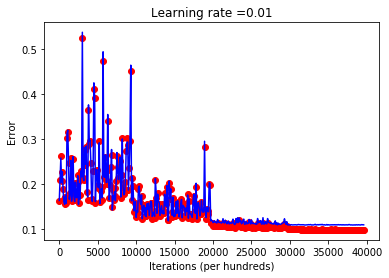

In [34]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=0)
ann_model.fit(X_train, y_train, X_valid=X_test, Y_valid=y_test)

In [35]:
ann_model = tf_ann(learning_rate= 0.01,
                    lr_decay_step = 20000,
                    lr_decay_rate = .1,
                    bn_decay_rate = 0.5,
                    reg_loss_weight = 0.8,
                    l1_ratio = 0.95,
                    num_epochs = 40000, 
                    minibatch_size = 512,
                    layer_count = 3, 
                    hidden_neuron =  [64, 32],
                    drop_rates = [0.0, 0.0, 0.0],
                    print_cost = False, # don't want to print cost during cv
                    profiling = False)
cross_validate(model= ann_model, X=train_x, y=train_y, fold_num=3, error_func=root_mean_squred_error)

fold  1  valid error:  0.118323365819
fold  2  valid error:  0.104119713437
fold  3  valid error:  0.116149383279
3  fold(s) avg. valid error:  0.112864154178


### final NN model

lr_decay_step becomes 30000 (was 20000 above) <br>

Since we want decay the learning rate by 0.1 every 10000 epoch. <br>
From above, there are 2 updates \( ceil\(1456* \( 2/3 \) / 512 \) for 3 fold cv\) for 1 epoch, so the learning rate decays for every 20000 updates. <br>
We're going to use 5 kfold to build meta features in the stacking models, there are hence 3 updates for 1 epoch, so the learning rate should decay for every 30000 updates. <br>


p.s. submitted test set score by ANN train on full dataset: 0.12017 (randk 397, ~20%)

In [55]:
ann_model = tf_ann(learning_rate= 0.01,
                    lr_decay_step = 20000,
                    lr_decay_rate = .1,
                    bn_decay_rate = 0.5,
                    reg_loss_weight = 0.8,
                    l1_ratio = 0.95,
                    num_epochs = 40000, 
                    minibatch_size = 512,
                    layer_count = 3, 
                    hidden_neuron =  [64, 32],
                    drop_rates = [0.0, 0.0, 0.0],
                    print_cost = False, # don't want to print cost during cv
                    profiling = False)

# Base models

## other base models: ElasticNet, Lasso, Kernel Ridge, Gradient boost, xgboost, LightGBM, random forest

In [7]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

## First Stack

use 5 kfold out-of-fold predictions as output meta-features

In [57]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=0.87, random_state=3, max_iter=100000)
params = {
    'alpha': [0.005, 0.001, 0.0008, 0.0005, 0.0003],
    'l1_ratio': [1.0, 0.8, 0.6]
}
gs =  GridSearchCV(estimator=ENet, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= ENet, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'l1_ratio': 0.8, 'alpha': 0.0008} 0.11236879512


In [58]:
ENet = ElasticNet(alpha=0.0008, l1_ratio=0.8, random_state=3, max_iter=100000)

In [59]:
lasso = Lasso(alpha =0.0005, random_state=3, max_iter=100000)
params = {
    'alpha': [0.05, 0.001, 0.0008, 0.0005, 0.00025, 0.0001],
}
gs =  GridSearchCV(estimator=lasso, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lasso, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'alpha': 0.0008} 0.112391730561


In [60]:
lasso = Lasso(alpha =0.0008, random_state=3, max_iter=100000)

In [61]:
kr = KernelRidge(alpha=0.5, kernel='polynomial', degree=2, coef0=5.0)
params = {
    'alpha': [2.0, 1.0, 0.8, 0.5, 0.3],
    'coef0' : [2.0, 3.0, 4.0, 5.0, 6.0, 8.0]
}
gs =  GridSearchCV(estimator=kr, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= kr, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'coef0': 4.0, 'alpha': 1.0} 0.113859088469


In [62]:
kr = KernelRidge(alpha=1.0, kernel='polynomial', degree=2, coef0=4.0)

In [65]:
g_boost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.01,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=5,  
                                   loss='huber', random_state =5)
params = {
    #'learning_rate': [0.5, 0.1, 0.05, 0.01, 0.005],
    'max_depth' : [2, 3, 4, 6, 8],
    'min_samples_leaf' : [2, 3, 4, 8]
}
gs =  GridSearchCV(estimator=g_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= g_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'min_samples_leaf': 4, 'max_depth': 3} 0.111611714527


In [66]:
g_boost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.01,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=4,  
                                   loss='huber', random_state =5)
params = {
    'learning_rate': [0.05, 0.01, 0.005]
}
gs =  GridSearchCV(estimator=g_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'learning_rate': 0.01} 0.111611714527


In [67]:
g_boost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.01,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=4,  
                                   loss='huber', random_state =5)

In [80]:
xg_boost = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=6, min_child_weight=1.0,
                            #gamma=0.0,
                            #subsample=1.0, colsample_bytree=0.4,
                            #reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'max_depth' : [1, 2, 3, 4],
    'min_child_weight' : [0.0, 0.05, 0.1, 0.5, 1.0, 2.0]
}
gs =  GridSearchCV(estimator=xg_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'min_child_weight': 0.0, 'max_depth': 3} 0.118315791318


In [81]:
xg_boost = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.0,
                            #subsample=1.0, colsample_bytree=0.4,
                            #reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'gamma' : [.001, .005, .01, .05]
}
gs =  GridSearchCV(estimator=xg_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'gamma': 0.005} 0.117410521207


In [82]:
xg_boost = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=0.4,
                            #reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'subsample' : [1.0, 0.8, 0.6, 0.4],
    'colsample_bytree' : [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
}
gs =  GridSearchCV(estimator=xg_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))


{'colsample_bytree': 1.0, 'subsample': 1.0} 0.117410521207


In [83]:
xg_boost = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=1.0,
                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'reg_alpha' : [0.0, 0.2, 0.4, 0.8],
    'reg_lambda' : [0.0, 0.2, 0.4, 0.8, 1.0]
}
gs =  GridSearchCV(estimator=xg_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))


{'reg_lambda': 1.0, 'reg_alpha': 0.0} 0.117410521207


In [84]:
xg_boost = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=1.0,
                            reg_alpha=0.0, reg_lambda=1.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'learning_rate' : [0.05, 0.1, 0.2]
}
gs =  GridSearchCV(estimator=xg_boost, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))


{'learning_rate': 0.1} 0.117410521207


In [85]:
xg_boost = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=1.0,
                            reg_alpha=0.0, reg_lambda=1.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )

In [86]:
lgbm = lgb.LGBMRegressor(objective='regression',
                         n_jobs = 4, n_estimators=2200,
                         #max_depth=3, min_child_weight=1.0,
                         #min_split_gain = 0,
                         #subsample = 1.0, subsample_freq = 1.0, colsample_bytree = 0.6,
                         #reg_alpha=0.175, reg_lambda=0.0,
                         #learning_rate=0.05, 
                         #bagging_fraction = 0.8, bagging_freq = 5, 
                         #feature_fraction = 1.0,
                         feature_fraction_seed=9, bagging_seed=9)



params = {
    'max_depth' : [1, 2, 3, 4],
    'min_child_weight' : [0.0, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5]
}

gs =  GridSearchCV(estimator=lgbm, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lgbm, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'min_child_weight': 0.0, 'max_depth': 1} 0.121402188772


In [88]:
lgbm = lgb.LGBMRegressor(objective='regression',
                         n_jobs = 4, n_estimators=2200,
                         max_depth=1, min_child_weight=0.0,
                         #min_split_gain = 0,
                         #subsample = 1.0, subsample_freq = 1.0, colsample_bytree = 0.6,
                         #reg_alpha=0.175, reg_lambda=0.0,
                         #learning_rate=0.05, 
                         #bagging_fraction = 0.8, bagging_freq = 5, 
                         #feature_fraction = 1.0,
                         feature_fraction_seed=9, bagging_seed=9)


params = {
    'min_split_gain' : [.1, .01, .05, .001, .0]
}


gs =  GridSearchCV(estimator=lgbm, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lgbm, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'min_split_gain': 0.001} 0.121402188772


In [90]:
lgbm = lgb.LGBMRegressor(objective='regression',
                         n_jobs = 4, n_estimators=2200,
                         max_depth=1, min_child_weight=0.0,
                         min_split_gain = 0.001,
                         #subsample = 1.0, subsample_freq = 1.0, colsample_bytree = 0.6,
                         #reg_alpha=0.175, reg_lambda=0.0,
                         #learning_rate=0.05, 
                         #bagging_fraction = 0.8, 
                         bagging_freq = 1, 
                         #feature_fraction = 1.0,
                         feature_fraction_seed=9, bagging_seed=9)


params = {
    'subsample' : [1.0, 0.8, 0.6],
    'subsample_freq': [1.0, 0.8, 0.6],
    'colsample_bytree' : [.1, .2, .4, .6, .8, 1.0]
}


gs =  GridSearchCV(estimator=lgbm, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lgbm, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'subsample_freq': 1.0, 'colsample_bytree': 0.1, 'subsample': 1.0} 0.119798409535


In [93]:
lgbm = lgb.LGBMRegressor(objective='regression',
                         n_jobs = 4, n_estimators=2200,
                         max_depth=1, min_child_weight=0.0,
                         min_split_gain = 0.001,
                         subsample = 1.0, subsample_freq = 1.0, colsample_bytree = 0.1,
                         #reg_alpha=0.175, reg_lambda=0.0,
                         #learning_rate=0.05, 
                         #bagging_fraction = 0.8, 
                         bagging_freq = 1, 
                         #feature_fraction = 1.0,
                         feature_fraction_seed=9, bagging_seed=9)


params = {
    'reg_alpha' : [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'reg_lambda' : [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'learning_rate' : [0.4, 0.2, 0.1, 0.05]
}


gs =  GridSearchCV(estimator=lgbm, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lgbm, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'reg_lambda': 0.2, 'reg_alpha': 0.2, 'learning_rate': 0.1} 0.119289912611


In [94]:
lgbm = lgb.LGBMRegressor(objective='regression',
                         n_jobs = 4, n_estimators=2200,
                         max_depth=1, min_child_weight=0.0,
                         min_split_gain = 0.001,
                         subsample = 1.0, subsample_freq = 1.0, colsample_bytree = 0.1,
                         reg_alpha=0.2, reg_lambda=0.2,
                         learning_rate=0.1, 
                         #bagging_fraction = 0.8, 
                         bagging_freq = 1, 
                         #feature_fraction = 1.0,
                         feature_fraction_seed=9, bagging_seed=9)


params = {
    'bagging_fraction' : [.2, .4, .6, .8, 1.],
    'bagging_freq' : [1, 5, 10],
    'feature_fraction' : [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
}


gs =  GridSearchCV(estimator=lgbm, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lgbm, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'feature_fraction': 0.1, 'bagging_fraction': 1.0, 'bagging_freq': 1} 0.119289912611


In [95]:
lgbm = lgb.LGBMRegressor(objective='regression',
                         n_jobs = 4, n_estimators=2200,
                         max_depth=1, min_child_weight=0.0,
                         min_split_gain = 0.001,
                         subsample = 1.0, subsample_freq = 1.0, colsample_bytree = 0.1,
                         reg_alpha=0.2, reg_lambda=0.2,
                         learning_rate=0.1, 
                         bagging_fraction = 1.0, 
                         bagging_freq = 1, 
                         feature_fraction = 0.1,
                         feature_fraction_seed=9, bagging_seed=9)

In [97]:
rf = RandomForestRegressor(n_jobs = 4, n_estimators=1200,
#                           max_depth=3, min_weight_fraction_leaf=0.3,
#                           min_impurity_decrease = 0.01,
#                           max_features='sqrt', 
                            random_state =5)

params = {
    'max_depth' : [2, 4, 8, 16, 20, 24, None],
    'min_weight_fraction_leaf' : [0.0, 0.1],
    #'min_impurity_decrease' : [0.0, 0.005, 0.01, 0.05, 0.1, 0.2]
}


gs =  GridSearchCV(estimator=rf, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'min_weight_fraction_leaf': 0.0, 'max_depth': 24} 0.135775559958


In [98]:
rf = RandomForestRegressor(n_jobs = 4, n_estimators=1200, 
                           max_depth=24, min_weight_fraction_leaf=0.0,
                           min_impurity_decrease = 0.01,
                           #max_features='sqrt', 
                           random_state =5)

params = {
    'min_impurity_decrease' : [0.0, 0.005, 0.01, 0.05, 0.1, 0.2]
}


gs =  GridSearchCV(estimator=rf, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'min_impurity_decrease': 0.0} 0.135775559958


In [99]:
rf = RandomForestRegressor(n_jobs = 4, n_estimators=1200, 
                           max_depth=24, min_weight_fraction_leaf=0.0,
                           min_impurity_decrease = 0.0,
                           #max_features='sqrt', 
                           random_state =5)

params = {
    'max_features' : ['log2', 'sqrt', 'auto']
}


gs =  GridSearchCV(estimator=rf, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'max_features': 'sqrt'} 0.134442283673


In [100]:
rf = RandomForestRegressor(n_jobs = 4, n_estimators=1200, 
                           max_depth=24, min_weight_fraction_leaf=0.0,
                           min_impurity_decrease = 0.0,
                           max_features='sqrt', 
                           random_state =5)

In [101]:
model_used = {
    "ann" : ann_model,
    "enet": ENet,
    "lasso": lasso,
    "kernel ridge": kr,
    "gradient boost": g_boost,
    "xgboost": xg_boost,
    "lgbm" : lgbm,
    "rf" : rf
}

In [19]:
from stacking_models_api import StackingAveragedModels

In [105]:
sam = StackingAveragedModels(model_used, n_folds=3, target_col='SalePrice')

In [107]:
sam.stacked_fit(train_x, train_y, test_x)


 rf
rmse= 0.135571257856
rmse= 0.125085046677
rmse= 0.138781188146
Avg rmse =  0.133145830893

 kernel ridge
rmse= 0.121728495096
rmse= 0.106037079028
rmse= 0.110669025898
Avg rmse =  0.112811533341

 gradient boost
rmse= 0.114363112458
rmse= 0.103684826251
rmse= 0.115083737156
Avg rmse =  0.111043891955

 lgbm
rmse= 0.122096425503
rmse= 0.109523401481
rmse= 0.117474551333
Avg rmse =  0.116364792772

 lasso
rmse= 0.118214171381
rmse= 0.103011752421
rmse= 0.110905109112
Avg rmse =  0.110710344305

 enet
rmse= 0.118149709713
rmse= 0.102948722004
rmse= 0.110452453184
Avg rmse =  0.110516961634

 xgboost
rmse= 0.122357069013
rmse= 0.111543323683
rmse= 0.12384805794
Avg rmse =  0.119249483545

 ann
rmse= 0.118358624823
rmse= 0.103737561989
rmse= 0.116138552571
Avg rmse =  0.112744913128


(             rf  kernel ridge  gradient boost       lgbm      lasso  \
 0     12.228147     12.230758       12.223599  12.246692  12.236971   
 1     12.030825     12.157050       12.086603  12.135767  12.170124   
 2     12.294408     12.297327       12.277110  12.290987  12.311549   
 3     12.139771     12.082516       12.114035  12.065493  12.086461   
 4     12.559810     12.584234       12.580140  12.587047  12.581672   
 5     11.939271     12.004702       12.000093  11.970876  12.010030   
 6     12.519285     12.532337       12.557907  12.552816  12.549464   
 7     12.302628     12.329597       12.345605  12.215672  12.313500   
 8     11.986967     11.707431       11.769883  11.743167  11.721521   
 9     11.755240     11.693429       11.722010  11.736384  11.659633   
 10    11.805134     11.766566       11.784946  11.759732  11.763853   
 11    12.813674     12.898971       12.929246  12.930546  12.846425   
 12    11.756634     11.784292       11.801011  11.818725  11.78

In [108]:
sam.save_to_csv('stage_1')

In [109]:
ENetCV = ElasticNetCV(cv=5, random_state=0, max_iter=10000, l1_ratio=1.0)
test_pred = sam.meta_fit(ENetCV)

meta model's training set mse=  0.10667634032 



In [110]:
submission = pd.DataFrame()
submission['SalePrice'] = test_pred
submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission.to_csv('final_answer.csv')

## Second Stack

use 3 kfold out-of-fold predictions as output meta-features

In [8]:
train_2 = pd.read_csv("stage_1_meta_train.csv")
test_2 = pd.read_csv("stage_1_meta_test.csv")

stage_2_features = list(train_2.columns)
stage_2_features.remove(target)

train_2_x = train_2[stage_2_features]
train_2_y = train_2[target]
test_2_x = test_2[stage_2_features]

print(train_2_x.shape, test_2_x.shape)

(1456, 8) (1459, 8)


In [112]:
ENet_2 = ElasticNet(random_state=3, max_iter=100000)
params = {
    'alpha': [0.005, 0.001, 0.0008, 0.0005, 0.0003, 0.0001],
    'l1_ratio': [1.0, 0.8, 0.6, 0.4, 0.2]
}
gs =  GridSearchCV(estimator=ENet_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_2_x, train_2_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= ENet, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'l1_ratio': 0.6, 'alpha': 0.0003} 0.10766177399


In [9]:
ENet_2 = ElasticNet(alpha=.0003, l1_ratio=.6, random_state=3, max_iter=100000)

In [114]:
lasso_2 = Lasso(random_state=3, max_iter=100000)
params = {
    'alpha': [0.2, 0.1, 0.05, 0.001, 0.0008, 0.0005, 0.00025, 0.0001],
}
gs =  GridSearchCV(estimator=lasso_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= lasso, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'alpha': 0.0008} 0.112391730561


In [10]:
lasso_2 = Lasso(alpha= 0.0008, random_state=3, max_iter=100000)

In [117]:
g_boost_2 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.01,
                                   max_depth=3, max_features='sqrt',
                                   #min_samples_leaf=3,  
                                   loss='huber', random_state =5)
params = {
    #'learning_rate': [0.05, 0.01, 0.005],
    'max_depth' : [3.0, 4.0, 5.0, 6.0, 7.0],
    'min_samples_leaf' : [2, 3, 4, 6, 8]
}
gs =  GridSearchCV(estimator=g_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'min_samples_leaf': 4, 'max_depth': 4.0} 0.115009474993


In [118]:
g_boost_2 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=4,  
                                   loss='huber', random_state =5)
params = {
    'learning_rate': [0.05, 0.01, 0.005],
    #'max_depth' : [3.0, 4.0, 5.0, 6.0, 7.0],
    #'min_samples_leaf' : [2, 3, 4]
}
gs =  GridSearchCV(estimator=g_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'learning_rate': 0.01} 0.115009474993


In [11]:
g_boost_2 = GradientBoostingRegressor(n_estimators=1200, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=4,  
                                   loss='huber', random_state =5)

In [122]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
#                            max_depth=6, min_child_weight=1.0,
#                            gamma=0.0,
#                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'max_depth' : [1, 2, 3, 4, 8, 16],
    'min_child_weight' : [0, 0.5, 1.0, 1.5, 2.0, 2.5]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'min_child_weight': 0, 'max_depth': 3} 0.118315791318


In [123]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
#                            gamma=0.0,
#                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'gamma' : [.001, .005, .01, .03, .05]
}

gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'gamma': 0.005} 0.117410521207


In [124]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
#                            subsample=1.0, colsample_bytree=0.4,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'subsample' : [1.0, 0.8, 0.6, 0.4],
    'colsample_bytree' : [0.4, 0.6, 0.8, 1.0]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'colsample_bytree': 1.0, 'subsample': 1.0} 0.117410521207


In [12]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=1.0,
#                            reg_alpha=0.0, reg_lambda=0.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'reg_alpha' : [0.0, 0.2, 0.4, 0.8, 1.0],
    'reg_lambda' : [0.0, 0.2, 0.4, 0.8, 1.0]
}
gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)

{'reg_alpha': 0.0, 'reg_lambda': 1.0} 0.117410521207


In [13]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=1.0,
                            reg_alpha=0.0, reg_lambda=1.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )
#cross_validate(model= xg_boost, X=train_x, y=train_y, fold_num=5, error_func=root_mean_squred_error)
params = {
    'learning_rate' : [0.05, 0.1, 0.2]
}

gs =  GridSearchCV(estimator=xg_boost_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=3)
gs.fit(train_x, train_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'learning_rate': 0.1} 0.117410521207


In [14]:
xg_boost_2 = xgb.XGBRegressor(n_estimators=2200, learning_rate=0.1, 
                            max_depth=3, min_child_weight=0.0,
                            gamma=0.005,
                            subsample=1.0, colsample_bytree=1.0,
                            reg_alpha=0.0, reg_lambda=1.0,
                            silent=1,
                            nthread=4,
                            eval_metric = 'rmse',
                            tree_method = 'exact',
                            grow_policy = 'lossguide',
                            booster = 'gbtree'
                            )

In [15]:
rf_2 = RandomForestRegressor(n_jobs = 4, n_estimators=1200) 
params = {
    'max_depth' : [1,2, 3, 4, 8],
    #'min_weight_fraction_leaf' : [0.0, 0.1],
    #'min_impurity_decrease' : [0.0, 0.005, 0.01, 0.05, 0.1, 0.2]
}


gs =  GridSearchCV(estimator=rf_2, param_grid = params, scoring='neg_mean_squared_error', iid=False, cv=5)
gs.fit(train_2_x, train_2_y)
print(gs.best_params_, np.sqrt(gs.best_score_*-1))

{'max_depth': 4} 0.111421771259


In [16]:
rf_2 = RandomForestRegressor(n_jobs = 4, n_estimators=1200, max_depth=4) 

In [17]:
model_used_2 = {
    "enet": ENet_2,
    "lasso": lasso_2,
    "gradient boost": g_boost_2,
    "xgboost": xg_boost_2,
    #"lgbm" : lgbm,
    "rf" : rf_2
}

In [20]:
sam_2 = StackingAveragedModels(model_used_2, n_folds=3, target_col='SalePrice')

In [26]:
final_train, final_test = sam_2.stacked_fit(train_2_x, train_2_y, test_2_x)
final_train


 enet
rmse= 0.113877711674
rmse= 0.09839573275
rmse= 0.109593773712
Avg rmse =  0.107289072712

 lasso
rmse= 0.113646740945
rmse= 0.0984683966407
rmse= 0.109559595536
Avg rmse =  0.10722491104

 gradient boost
rmse= 0.122274586556
rmse= 0.1059801592
rmse= 0.112282656605
Avg rmse =  0.113512467453

 rf
rmse= 0.120649972048
rmse= 0.104355267711
rmse= 0.111461080209
Avg rmse =  0.112155439989

 xgboost
rmse= 0.125583422509
rmse= 0.11047098366
rmse= 0.115668065625
Avg rmse =  0.117240823931


,enet,lasso,gradient boost,rf,xgboost,SalePrice
0,12.226361,12.225693,12.255861,12.244748,12.278654,12.247699
1,12.140595,12.140758,12.095637,12.083227,12.084960,12.109016
2,12.289238,12.289149,12.293741,12.295004,12.296836,12.317171
3,12.092465,12.093630,12.079571,12.077023,12.002583,11.849405
4,12.596863,12.593990,12.616819,12.639735,12.603800,12.429220
5,12.002444,11.999765,11.995024,11.993193,12.015658,11.870607
6,12.567770,12.565648,12.576952,12.606615,12.601923,12.634606
7,12.328046,12.327323,12.277636,12.287213,12.284496,12.206078
8,11.736605,11.737548,11.702232,11.744284,11.726677,11.774528
9,11.679654,11.680609,11.676945,11.690576,11.659847,11.678448


In [25]:
sam_2.save_to_csv('stage_2')

do grid search on the final_train\test on enet\lasso\xg_bbost\lgbm and ensemble!

In [28]:
ENetCV_2 = ElasticNetCV(cv=10, random_state=0, max_iter=10000, l1_ratio=.9)
test_pred_2_enet = sam_2.meta_fit(ENetCV_2)

lasso_2 = Lasso(alpha =0.0001, random_state=3, max_iter=10000)
test_pred_2_lasso = sam_2.meta_fit(lasso_2)

xg_boost_2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1, nthread = -1)
test_pred_2_xg = sam_2.meta_fit(xg_boost_2)

weight = [0.11959, 0.11978, 0.12072]
weight = np.exp(weight)
weight_sum = weight.sum()
weight /= weight_sum

submission = pd.DataFrame()
submission['SalePrice'] = weight[0]*test_pred_2_enet + weight[1]*test_pred_2_lasso + weight[2]*test_pred_2_xg

submission['SalePrice'] = np.expm1(submission['SalePrice'])
submission['SalePrice'] .astype('float')
submission.to_csv('final_answer_2.csv')

meta model's training set mse=  0.107436569337 

meta model's training set mse=  0.10748987284 

meta model's training set mse=  0.0957237452219 



public LB score: 0.11919